In [7]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

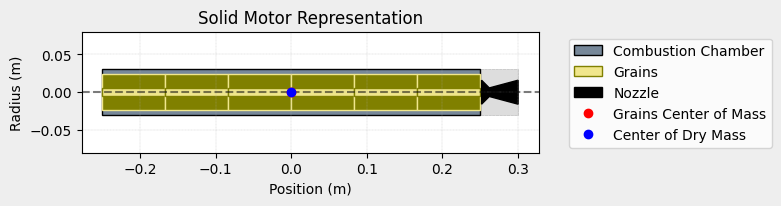

Nozzle Details
Nozzle Radius: 0.01588 m
Nozzle Throat Radius: 0.00565 m

Grain Details
Number of Grains: 6
Grain Spacing: 0 m
Grain Density: 1479.307 kg/m3
Grain Outer Radius: 0.0237 m
Grain Inner Radius: 0.00565 m
Grain Height: 0.0834 m
Grain Volume: 0.000 m3
Grain Mass: 0.205 kg

Motor Details
Total Burning Time: 4.1 s
Total Propellant Mass: 1.232 kg
Average Propellant Exhaust Velocity: 1851.818 m/s
Average Thrust: 556.449 N
Maximum Thrust: 915.996 N at 0.057 s after ignition.
Total Impulse: 2281.440 Ns



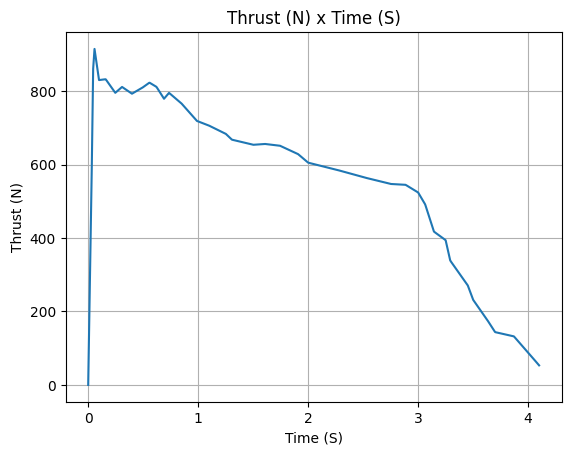

In [8]:
K480 = SolidMotor(
    thrust_source="AeroTech_K480W.csv",
    dry_mass=0.827,
    dry_inertia=(.001483,.001483,.000578),
    nozzle_radius=.01588,
    grain_number=6,
    grain_density=1479.307,
    grain_outer_radius=.0237,
    grain_initial_inner_radius=.00565,
    grain_initial_height=.0834,
    grain_separation=0,
    grains_center_of_mass_position=0,
    center_of_dry_mass_position=0,
    nozzle_position=.2502 + .05,
    burn_time=4.1,
    throat_radius=.00565,
    coordinate_system_orientation="combustion_chamber_to_nozzle",
)
K480.draw()
K480.info()

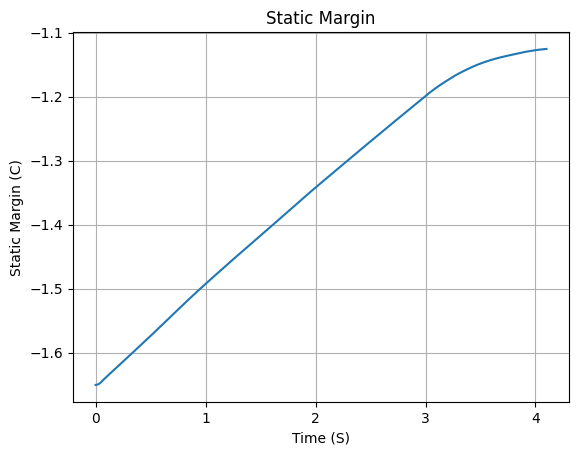

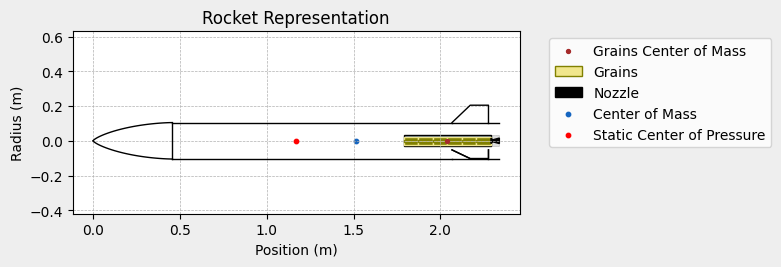

In [21]:
OneL = Rocket (
    mass = 5.049,
    radius = .105,
    inertia = (1.11, 1.11, .02783),
    coordinate_system_orientation = "nose_to_tail",
    center_of_mass_without_motor = 1.30,
    power_off_drag = "./CDOFF.csv",
    power_on_drag = "./CDON.csv"
)

nose_cone = OneL.add_nose(length = .457, kind = "lvhaack", position = 0)
fin_set = OneL.add_trapezoidal_fins(n=3, root_chord=.21, tip_chord=.105, span=.1, position=2.0673, cant_angle=0)
OneL.add_motor(K480, 2.29-.2502)
Main = OneL.add_parachute("Main", cd_s=.97, trigger="apogee")
OneL.plots.static_margin()
OneL.plots.draw()

In [ ]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

env.max_expected_height=3400

env.set_atmospheric_model(
    type="custom_atmosphere",
    pressure=None,
    temperature=300,
    wind_u=5,
    wind_v=-2
)

test_flight = Flight(
    rocket=OneL, 
    environment=env, 
    rail_length=5, 
    inclination=85, 
    heading=0,
    verbose=True,
    )

env.info()

test_flight.all_info()

KeyboardInterrupt: 